#Sistema de amortização de financiamento

Segundo o Wikipédia, amortização *é um processo de extinção de uma dívida através de pagamentos periódicos, que são realizados em função de um planejamento, de modo que cada prestação corresponde à soma do reembolso do capital ou do pagamento dos juros do saldo devedor, podendo ser o reembolso de ambos, sendo que os juros são sempre calculados sobre o saldo devedor.*

O pagamento realizado nesse processo consiste na soma entre a amortização e juros do financiamento.

Os sistemas de amortização mais conhecidos são o SAC e o PRICE.

###Sistema SAC

O sistema SAC(sistema de amortizações constantes) é um regime de financiamento em que os valores dos pagamentos são reduzidos ao longo do tempo. A redução é aplicada ao juros, visto que as amortizações permanecem constantes ao longo tempo.  

[*Página original do exemplo*](http://www2.unemat.br/eugenio/files_financeira/8_sistema_de_amortizacao.htm)

**Exemplo 1**: Calcular os valores das parcelas de juros e amortizações referentes a um empréstimo de R$ 1.000, pelo sistema SAC, a uma taxa de 4 % a.m. e prazo de 10 meses.

In [0]:
saldoDevedorInicial = 1000
rate = 0.04
nper = 10

In [2]:
#Para calcularmos o valor das amortizações, fazemos:
amor = saldoDevedorInicial/10
amor

100.0

In [3]:
#Os juros são calculados sobre o saldo devedor
juros = amor * nper * rate
juros

40.0

In [0]:
#prestacao é igual a: pmt = juros + amortizacao

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
periodo = np.linspace(0,10,11, dtype= int)
periodo

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [0]:

saldoDevedor = saldoDevedorInicial

jurosPagamentos = []
saldoList = []
pmt = []
amortizacao = []

for i in range(10):

    pmt.append(amor + (saldoDevedor * rate))
    jurosPagamentos.append(saldoDevedor * rate)  
    saldoList.append(saldoDevedor)
    amortizacao.append(amor)

    saldoDevedor -= amortizacao[i]


jurosPagamentos.insert(0,0)
saldoList.append(0)
pmt.insert(0,0)
amortizacao.insert(0,0)
    

In [0]:
sac = pd.DataFrame({'Período': periodo, 'Prestação': pmt, 'Juros': jurosPagamentos, 'Amortização': amortizacao, 'Saldo Devedor': saldoList})

In [9]:
sac

,Período,Prestação,Juros,Amortização,Saldo Devedor
0,0,0.0,0.0,0.0,1000.0
1,1,140.0,40.0,100.0,900.0
2,2,136.0,36.0,100.0,800.0
3,3,132.0,32.0,100.0,700.0
4,4,128.0,28.0,100.0,600.0
5,5,124.0,24.0,100.0,500.0
6,6,120.0,20.0,100.0,400.0
7,7,116.0,16.0,100.0,300.0
8,8,112.0,12.0,100.0,200.0
9,9,108.0,8.0,100.0,100.0


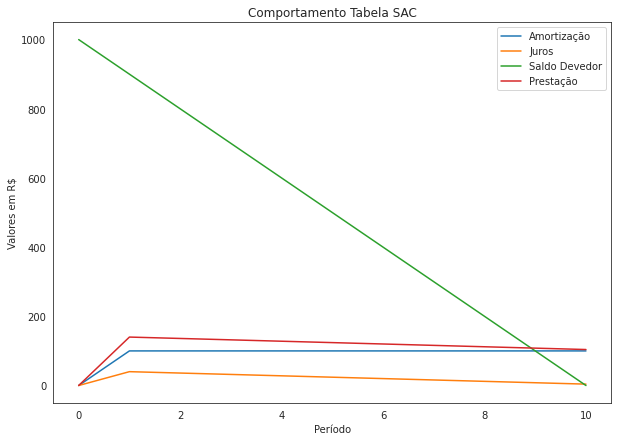

In [60]:
plt.figure(figsize= (10,7))
sns.set_style('white')

plt.title("Comportamento Tabela SAC")

sns.lineplot(x= 'Período', y= 'Amortização', data=sac, label= 'Amortização')
sns.lineplot(x='Período', y='Juros', data=sac, label='Juros')
sns.lineplot(x='Período', y='Saldo Devedor', data=sac, label='Saldo Devedor')
sns.lineplot(x='Período', y='Prestação', data=sac, label='Prestação')

plt.xlabel('Período')
plt.ylabel("Valores em R$")

plt.show()

###Sistema PRICE

O sistema PRICE ou sistema francês é o regime de financiamente em que os pagamentos são constantes, calculados por uma série uniforme. Ao longo do tempo, a amortização é elevada e o juros reduzidos.

####Série uniforme de pagamentos


![price](http://www2.unemat.br/eugenio/files_financeira/8_sistema_de_amortizacao_arquivos/image002.gif)


[*Página original do exemplo*](http://www2.unemat.br/eugenio/files_financeira/8_sistema_de_amortizacao.htm)

**Exemplo 1**: Calcular os valores das parcelas de juros e amortizações referentes a um empréstimo de R$ 1.000, pelo sistema PRICE, a uma taxa de 4 % a.m. e prazo de 10 meses

In [0]:
from math import pow

In [0]:
saldoDevedorInicialPrice = 1000
ratePrice = 0.04
nperPrice = 10


In [41]:
presPrice =  (1000 * ratePrice * pow((1+ratePrice),nperPrice)) / (pow((1+ratePrice),nperPrice) - 1)

round(presPrice, 2)

123.29

In [42]:
jurosPrice = saldoDevedorInicialPrice * rate
jurosPrice

40.0

In [43]:
amorPrice = presPrice - jurosPrice
round(amorPrice, 2)

83.29

In [0]:
saldoDevedorPrice = saldoDevedorInicialPrice

jurosPagamentosPrice = []
saldoListPrice = []
pmtPrice = []
amortizacaoPrice = []

for i in range(10):

    pmtPrice.append(round(presPrice, 2))
    jurosPagamentosPrice.append(round((saldoDevedorPrice * rate),2))  
    saldoListPrice.append(saldoDevedorPrice)
    amortizacaoPrice.append(round(presPrice - (saldoDevedorPrice * rate),2))

    saldoDevedorPrice -= amortizacaoPrice[i]


jurosPagamentosPrice.insert(0,0)
saldoListPrice.append(0)
pmtPrice.insert(0,0)
amortizacaoPrice.insert(0,0)

In [0]:
price = pd.DataFrame({'Período': periodo, 'Prestação': pmtPrice, 'Juros': jurosPagamentosPrice, 'Amortização': amortizacaoPrice, 'Saldo Devedor': saldoListPrice})

In [53]:
price

,Período,Prestação,Juros,Amortização,Saldo Devedor
0,0,0.00,0.00,0.00,1000.00
1,1,123.29,40.00,83.29,916.71
2,2,123.29,36.67,86.62,830.09
3,3,123.29,33.20,90.09,740.00
4,4,123.29,29.60,93.69,646.31
5,5,123.29,25.85,97.44,548.87
6,6,123.29,21.95,101.34,447.53
7,7,123.29,17.90,105.39,342.14
8,8,123.29,13.69,109.61,232.53
9,9,123.29,9.30,113.99,118.54


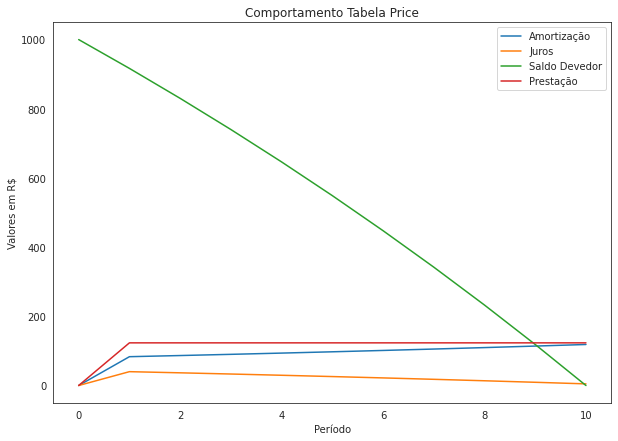

In [61]:
plt.figure(figsize= (10,7))
sns.set_style('white')

plt.title("Comportamento Tabela Price")

sns.lineplot(x= 'Período', y= 'Amortização', data=price, label= 'Amortização')
sns.lineplot(x='Período', y='Juros', data=price, label='Juros')
sns.lineplot(x='Período', y='Saldo Devedor', data=price, label='Saldo Devedor')
sns.lineplot(x='Período', y='Prestação', data=price, label='Prestação')

plt.xlabel('Período')
plt.ylabel("Valores em R$")

plt.show()

In [48]:
jurosSac = sac['Juros'].sum()

jurosSac

220.0

In [59]:
jurosPrice = price['Juros'].sum()

round(jurosPrice, 2)

232.9

Logo, é possível verificar, que o sistema Price é mais rentável em comparação ao sistema SAC.